In [ ]:
import pandas as pd
!pip install autocorrect
!python3 -m nltk.downloader stopwords
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from autocorrect import Speller

# Initialize the spell checker and grammar checker


lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))
stop_words.remove('not')
df = pd.read_csv("/content/drive/MyDrive/flipkart.csv")

def correct_spelling(text):
  spell = Speller(lang="en")
  tokens = word_tokenize(text)
  corrected_text = " ".join([spell(word) for word in tokens])
  return corrected_text

def assign_sentiment(rating):
  if rating >= 4:
    return "positive"
  else:
    return "negative"

# Apply the function to the 'rating' column and create a new 'sentiment' column
df['sentiment'] = df['Rating'].apply(assign_sentiment)
df["Review"] = df["Review"].apply(correct_spelling)
non_strings = df["Review"].apply(lambda x: not isinstance(x, str))

# Drop rows with non-string values
df = df.drop(df.loc[non_strings].index)

# Reset the index
df = df.reset_index(drop=True)

def clean_text(text):
  # Remove special characters and punctuation
  text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
  # Convert text to lowercase
  text = text.lower()
  return text

def remove_stopwords(tokens):
  filtered_tokens = [token for token in tokens if token not in stop_words]
  return filtered_tokens

def lemmatize_tokens(tokens):
  lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
  return lemmatized_tokens

df["token"] = df["Review"].apply(clean_text)
df["token"] = df["token"].apply(word_tokenize)
df["token"] = df["token"].apply(remove_stopwords)
df["token"] = df["token"].apply(lemmatize_tokens)
print(df)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622363 sha256=322b3f643fb7352f1f108d74d3beab7970d7a3c50b64895bfde96b238a07a732
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect
/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


      Unnamed: 0                                       Product_name  \
0              0  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
1              1  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
2              2  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
3              3  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
4              4  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
...          ...                                                ...   
2299        2299  MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...   
2300        2300  MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...   
2301        2301  MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...   
2302        2302  MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...   
2303        2303  MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...   

                                                 Review  Rating sentiment  \
0     Best under 60k Great performance got it for ar...       5  posit

In [ ]:
from gensim.models import Word2Vec

# Load the tokenized words
tokenized_words = df["token"].tolist()

# Train the Word2Vec model
model = Word2Vec(tokenized_words, min_count=1, vector_size=100, window=5, sg=1)
model.save("word2vec.model")
word="good"
print(f"{word}: {model.wv[word]}")
similar_words = model.wv.most_similar("good")
for word, score in similar_words:
    print(f"{word}: {score}")

good: [ 4.72491756e-02  2.99793435e-04 -1.51717082e-01  2.54198402e-01
 -8.80881026e-02 -3.70839983e-01  3.94217670e-02  5.82000017e-01
 -4.66419846e-01 -2.14484975e-01 -7.16870129e-02 -3.06099027e-01
 -1.97753876e-01 -5.48160113e-02  9.35009718e-02 -2.49730945e-01
  2.31314704e-01 -1.80825949e-01 -1.50498345e-01 -5.39998293e-01
  7.77342319e-02 -2.66253464e-02  4.34332527e-02 -3.42568941e-02
 -8.75471085e-02 -2.09898669e-02 -1.62251785e-01 -3.60920690e-02
 -2.14841127e-01  1.36627823e-01  2.56606936e-01  1.22449244e-03
  2.61522651e-01 -4.52879071e-01 -2.48424873e-01  3.17736685e-01
  1.09284900e-01 -7.78884962e-02 -2.58994430e-01 -4.94345874e-01
  1.71153650e-01 -1.35042742e-01 -1.99872702e-01 -8.22777972e-02
  2.43265331e-01 -8.52321684e-02 -1.42580375e-01 -1.44043371e-01
  1.75344273e-01  2.59193089e-02  6.89727664e-02 -1.70815974e-01
 -8.61813352e-02  1.48451421e-02  2.48718280e-02  3.48953977e-02
  7.54166022e-02 -1.30853549e-01 -2.13773280e-01  1.91537216e-01
  2.69374728e-01  1

In [ ]:
import pandas as pd
!pip install keras_preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense,Dropout

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Review'])
tokenizer.word_index


{'is': 1,
 'and': 2,
 'good': 3,
 'the': 4,
 'it': 5,
 'this': 6,
 'i': 7,
 'for': 8,
 'to': 9,
 'very': 10,
 'in': 11,
 'phone': 12,
 'a': 13,
 'of': 14,
 'camera': 15,
 'not': 16,
 'with': 17,
 'but': 18,
 'product': 19,
 'quality': 20,
 'you': 21,
 'price': 22,
 'nice': 23,
 'best': 24,
 'battery': 25,
 'display': 26,
 'are': 27,
 "'s": 28,
 'so': 29,
 'also': 30,
 'at': 31,
 'as': 32,
 '5': 33,
 'on': 34,
 'like': 35,
 "n't": 36,
 'my': 37,
 'have': 38,
 'awesome': 39,
 'performance': 40,
 'flipkart': 41,
 'no': 42,
 'mobile': 43,
 'that': 44,
 'can': 45,
 'after': 46,
 'all': 47,
 'money': 48,
 'sound': 49,
 'delivery': 50,
 'great': 51,
 'one': 52,
 'am': 53,
 'was': 54,
 'if': 55,
 'fast': 56,
 'from': 57,
 '2': 58,
 'range': 59,
 'use': 60,
 'better': 61,
 '3': 62,
 'buy': 63,
 '1': 64,
 'its': 65,
 'be': 66,
 'has': 67,
 'than': 68,
 'go': 69,
 'using': 70,
 'time': 71,
 '4': 72,
 'value': 73,
 'do': 74,
 'samsung': 75,
 'really': 76,
 'days': 77,
 'happy': 78,
 'only': 79,
 '

In [ ]:
vocab_size=len(tokenizer.word_index)+1
print(vocab_size)
from sklearn.model_selection import train_test_split
!pip install scikit-learn
import numpy as np
from sklearn.preprocessing import LabelEncoder
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['sentiment'], test_size=0.2)

# Print the shapes of the train and test sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
from tensorflow.keras.preprocessing.sequence import pad_sequences
!pip install gensim
import gensim
# Define the maximum sequence length
max_length = 100

# Pad the training and testing sequences
X_train_padded = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_length)
X_test_padded = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_length)

# Print the shapes of the padded sequences
print(f"X_train_padded shape: {X_train_padded.shape}")
print(f"X_test_padded shape: {X_test_padded.shape}")
labelencoder = LabelEncoder()
y_train = labelencoder.fit_transform(y_train)
y_test=labelencoder.fit_transform(y_test)

model = gensim.models.Word2Vec.load("word2vec.model")
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
  if word in model.wv:
    embedding_matrix[i] = model.wv[word]
print(embedding_matrix.shape)
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=100, trainable=False)
lstm_model = Sequential()
lstm_model.add(embedding_layer)
lstm_model.add(Dropout(0.5))
lstm_model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(1, activation='sigmoid'))
lstm_model.summary()
lstm_model.compile(loss='binary_crossentropy', optimizer="adam",metrics=['accuracy'])
model_history=lstm_model.fit(X_train_padded, y_train,batch_size=32,validation_data=(X_test_padded,y_test),epochs=10,verbose=1)


4406
X_train shape: (1843,)
X_test shape: (461,)
y_train shape: (1843,)
y_test shape: (461,)
X_train_padded shape: (1843, 100)
X_test_padded shape: (461, 100)
(4406, 100)
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 100, 100)          440600    
                                                                 
 dropout_8 (Dropout)         (None, 100, 100)          0         
                                                                 
 lstm_8 (LSTM)               (None, 100)               80400     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 521101 (1.99 MB)
Trainable params: 80501 (314.46 KB)
Non-trainable params: 440600 (1.68 MB)
_________________________________________

15/15 [==============================] - 1s 57ms/step
              precision    recall  f1-score   support

           0       0.67      0.14      0.23        73
           1       0.86      0.99      0.92       388

    accuracy                           0.85       461
   macro avg       0.76      0.56      0.57       461
weighted avg       0.83      0.85      0.81       461

Confusion Matrix: 
[[ 10  63]
 [  5 383]]
True Positive: 10
True Negative: 383
False Positive: 63
False Negative: 5

Precision: 0.8587443946188341
F1 Score: 0.9184652278177458
Accuracy: 0.8524945770065075




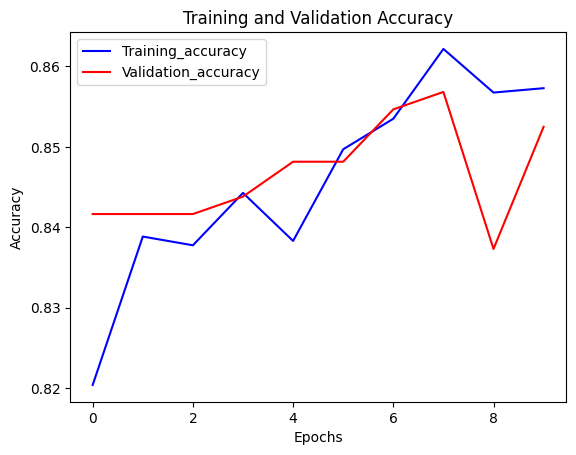

In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score, confusion_matrix, precision_score, accuracy_score, classification_report

y_pred=lstm_model.predict(X_test_padded)
y_pred=np.round(y_pred)
confusion_matrix = confusion_matrix(y_test,y_pred)
precision = precision_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))
print("Confusion Matrix: ")
print(confusion_matrix)
TP = confusion_matrix[0][0]
FP = confusion_matrix[0][1]
TN = confusion_matrix[1][1]
FN = confusion_matrix[1][0]
print("True Positive: {}".format(TP))
print("True Negative: {}".format(TN))
print("False Positive: {}".format(FP))
print("False Negative: {}".format(FN))
print()
print("Precision:", precision)
print("F1 Score:", f1_score)
print("Accuracy:", accuracy)
print()
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs=range(len(acc))
plt.plot(epochs,acc,label='Training_accuracy',color='blue')
plt.plot(epochs,val_acc,label='Validation_accuracy',color='red')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")
print()


In [ ]:
decoded_label = labelencoder.inverse_transform(y_test)
k=pd.DataFrame()
def pred(val):
    if(val<0.5):
        return 'negative'
    return 'positive'
k['Test_Reviews']=X_test
k['Prediction']=y_pred
k['Prediction']=k['Prediction'].apply(pred)
print(k.head(20))




                                           Test_Reviews Prediction
359                                           Mobile ok   positive
1081  Lots of Hang issues ... Battery gets drained v...   negative
1605  It is a good mobile for normal use .But if you...   positive
1667  This is really good phone . Here are few thing...   positive
1375  Cons : Speaker volume low , Camera not worth 2...   positive
754   best tv in this budgetPros -- great sound- pic...   positive
1639  Best phone of this best valuable price .. I th...   positive
343   Nice phone with okay display but good battery ...   positive
950   Amazing smartphone . Camera , battery back up ...   positive
816   Really it 's value for money . Picture quality...   positive
1071                                     Best 5g mobile   positive
1260  The phone is great there are some functions th...   positive
866                                                Good   positive
1159                                               Nice   posi

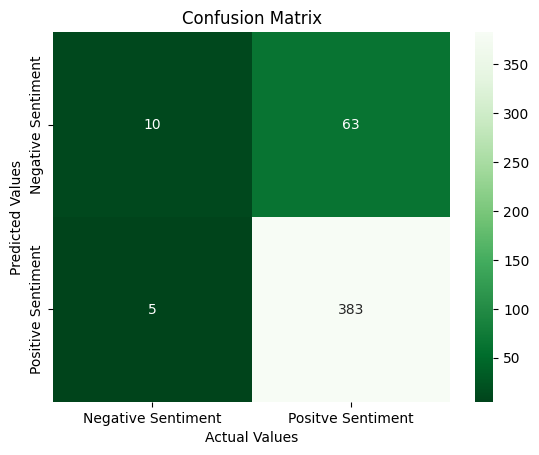

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the confusion matrix values
TP = 10
FP = 63
TN = 383
FN = 5

# Create a 2x2 matrix
cm_matrix = [[TP, FP], [FN, TN]]

# Create a heatmap
ax = plt.subplot()
sns.heatmap(cm_matrix, annot=True, ax=ax, fmt="d",cmap="Greens_r")

# Set labels and title
ax.set_ylabel('Predicted Values')
ax.set_xlabel('Actual Values')
ax.set_title('Confusion Matrix')

# Set tick labels for x-axis and y-axis
ax.xaxis.set_ticklabels(['Negative Sentiment', 'Positve Sentiment'])
ax.yaxis.set_ticklabels(['Negative Sentiment', 'Positive Sentiment'])

# Display the heatmap
plt.show()